# <center>Лабораторная работа №1<center>

Выполнила студентка группы 8О-407Б \
Бондарь Ксения

## <center>Второй dataset<center>

Источник: сайт [Kaggle](https://www.kaggle.com/) \
Ссылка на dataset: https://www.kaggle.com/dipam7/student-grade-prediction

## Описание

Этот датасет содержит достижения по математике учеников двух средних школ. По ссылке представлено два датасета по двум предметам: математика и португальский язык, я взяла только результаты по математике. Признаки данных включают в себя: оценки учащихся, демографические, социальные и школьные особенности. Подробное описание можно посмотреть по ссылке выше. Они были собраны с использованием школьных отчетов и анкет. 

**Задача:** предсказать годовую оценку (признак *G3*) учащегося по математике.

**Целевой признак:** G3

**Примечание от автора датасета:** целевой признак G3 имеет сильную корреляцию с признаками G2 и G1. Это происходит потому, что G3 - это итоговая оценка за год (выпущена в 3-м периоде), а G1 и G2 соответствуют оценкам за 1-й и 2-й период. Сложнее прогнозировать G3 без G2 и G1, но такой прогноз гораздо более полезен.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import preprocessing

Импортируем данные и посмотрим на содержимое:

In [2]:
data = pd.read_csv('data/student-mat.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


Информация о размерности датасета:

In [4]:
data.shape

(395, 33)

Информация о размерности данных: описание индекса, количество not-a-number элементов:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Видно, что у нас нет пропусков в данных, однако много нечисловых признаков. Придется заняться их кодированием.

Описательная стистика по всем признакам:

In [6]:
data.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


Можно заметить, что здесь не наблюдается признаков выбросов.

Количество уникальных значений для каждого столбца:

In [7]:
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

Можно заметить, что уникальных значений для нечисловых признаков относительно немного (а в большинстве их всего два), что очень упрощает задачу кодировки. Также не наблюдается признаков неявных дубликатов.

Посмотрим, что больше всего из числовых признаков влияет на годовую оценку G3 по корреляции:

In [8]:
data.corr()['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

## Кодирование данных

In [9]:
data_dict = dict(data.nunique())
print(data_dict)

{'school': 2, 'sex': 2, 'age': 8, 'address': 2, 'famsize': 2, 'Pstatus': 2, 'Medu': 5, 'Fedu': 5, 'Mjob': 5, 'Fjob': 5, 'reason': 4, 'guardian': 3, 'traveltime': 4, 'studytime': 4, 'failures': 4, 'schoolsup': 2, 'famsup': 2, 'paid': 2, 'activities': 2, 'nursery': 2, 'higher': 2, 'internet': 2, 'romantic': 2, 'famrel': 5, 'freetime': 5, 'goout': 5, 'Dalc': 5, 'Walc': 5, 'health': 5, 'absences': 34, 'G1': 17, 'G2': 17, 'G3': 18}


Для начала займемся кодированием данных типа *object*, принимающих всего два значения.

Закодируем сначала признаки, для которых значения только *yes* и *no*. Целесообразно преобразовать эти значения в *1* и *0* соответственно, отношение порядка нам здесь только поможет.

Т.к. здесь не умещаются все колонки, только те, в которых будем кодировать значения.

In [10]:
data_dict_binary = {'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'}
data[data_dict_binary]

,nursery,paid,higher,romantic,famsup,activities,internet,schoolsup
0,yes,no,yes,no,no,no,no,yes
1,no,no,yes,no,yes,no,yes,no
2,yes,yes,yes,no,no,no,yes,yes
3,yes,yes,yes,yes,yes,yes,yes,no
4,yes,yes,yes,no,yes,no,no,no
...,...,...,...,...,...,...,...,...
390,yes,yes,yes,no,yes,no,no,no
391,no,no,yes,no,no,no,yes,no
392,no,no,yes,no,no,no,no,no
393,no,no,yes,no,no,no,yes,no


In [11]:
for item in data_dict_binary:
    data.loc[data[item] == 'yes', item] = 1
    data.loc[data[item] == 'no', item] = 0
data[data_dict_binary]

,nursery,paid,higher,romantic,famsup,activities,internet,schoolsup
0,1,0,1,0,0,0,0,1
1,0,0,1,0,1,0,1,0
2,1,1,1,0,0,0,1,1
3,1,1,1,1,1,1,1,0
4,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
390,1,1,1,0,1,0,0,0
391,0,0,1,0,0,0,1,0
392,0,0,1,0,0,0,0,0
393,0,0,1,0,0,0,1,0


Для оставшихся признаков, в которых недопустимо отношение порядка, например, название школы или пол ученика (глупо говорить, что один пол умнее другого или ученики одной школы умнее другой только из-за принадлежности к определенной группе, пусть даже может существовать какая-то статистическая зависимость), воспользуемся кодировщиком *OneHotEncoder* из библиотеки *SciKit Learn*.

In [12]:
cat_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
for item in cat_cols:
    oneHotEncoder = preprocessing.OneHotEncoder(categories = "auto",sparse = False)
    temp = oneHotEncoder.fit_transform(data[[item]])
    l = list(set(data[item]))
    l_names = []
    for i in range(len(l)):
        name = item + str(i)
        l_names.append(name)
    oneHotEncoder_column = pd.DataFrame(temp, columns = l_names)#containating ohe column
    data = pd.concat([data,oneHotEncoder_column],axis = 1)
    data[l_names] = data[l_names].astype('int64')
    data.drop(item, axis = 1, inplace = True)
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Fjob2,Fjob3,Fjob4,reason0,reason1,reason2,reason3,guardian0,guardian1,guardian2
0,18,4,4,2,2,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0


**Что означают новые колонки:** \
*school0* - *GP* \
*school1* - *MS* \
*sex0* - *F* \
*sex1* - *M* \
*address0* - *R* \
*address1* - *U* \
*famsize0* - *GT3* \
*famsize1* - *LE3* \
*Pstatus0* - *A* \
*Pstatus1* - *T* \
*Mjob0* - *at_home* \
*Mjob1* - *health* \
*Mjob2* - *other* \
*Mjob3* - *services* \
*Mjob4* - *teacher* \
*Fjob0* - *at_home* \
*Fjob1* - *health* \
*Fjob2* - *other* \
*Fjob3* - *services* \
*Fjob4* - *teacher* \
*reason0* - *course* \
*reason1* - *home* \
*reason2* - *other* \
*reason3* - *reputation* \
*guardian0* - *father* \
*guardian1* - *mother* \
*guardian2* - *other* 

## Визуализация и анализ данных

Посмотрим, что больше всего влияет на годовую оценку *G3* по корреляции:

In [13]:
data.corr()['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
Mjob1         0.116158
address1      0.105756
sex1          0.103456
studytime     0.097820
reason3       0.095692
Fjob4         0.095374
famsize1      0.081407
Mjob3         0.078429
Pstatus0      0.058009
Mjob4         0.057712
Fjob1         0.057111
reason2       0.052008
famrel        0.051363
school0       0.045017
absences      0.034247
guardian0     0.032493
guardian1     0.022338
freetime      0.011307
Fjob0        -0.013385
Fjob3        -0.016108
reason1      -0.021359
school1      -0.045017
Walc         -0.051939
Fjob2        -0.053483
Dalc         -0.054660
Pstatus1     -0.058009
health       -0.061335
famsize0     -0.081407
guardian2    -0.087774
Mjob2        -0.096477
reason0      -0.098950
sex0         -0.103456
address0     -0.105756
Mjob0        -0.115634
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, d

Также взглянем на корреляционную матрицу:

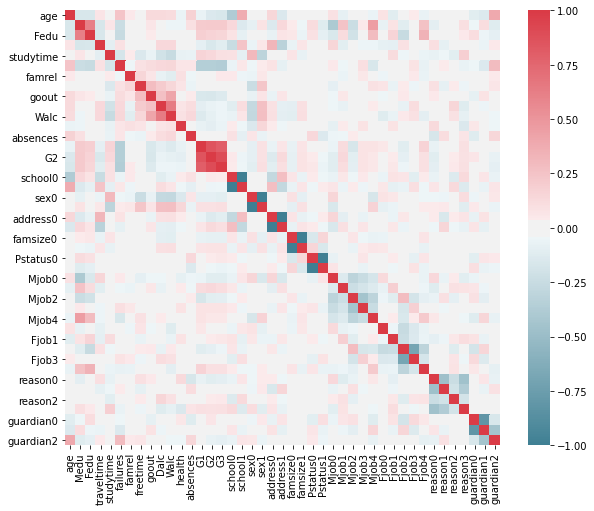

In [14]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax);

Как и ожидалось, оценки за полугодие очень коррелируют с годовой оценкой. \
Остальные же признаки коррелируют очень слабо. Однако, если взять признак с максимальным по модулю коэффициентом корреляции, то мы увидим, что это будет признак *failures*. Не очень понимаю смысл этих "неудач", но они отрицательно влияют на оценки учеников. Правда, влияют, конечно, слабо.

Посмотрим на диаграмму рассеивания:

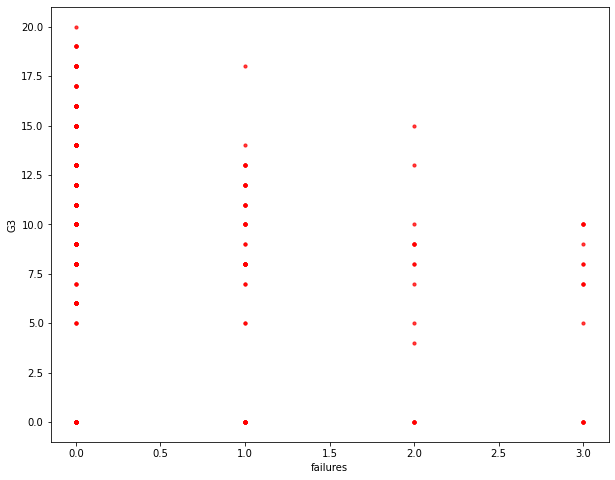

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
ax.scatter(data['failures'], data['G3'], s = 10, color = 'r', alpha = 0.75)
# ax.set_title(title)
ax.set_xlabel('failures')
ax.set_ylabel('G3');

В принципе, можно увидеть тенденцию, характерную для отрицательной корреляции, но, как было сказано выше, она очень слабая.

Посмотрим на плотности распределения трех величин: *G1*, *G2*, *G3*

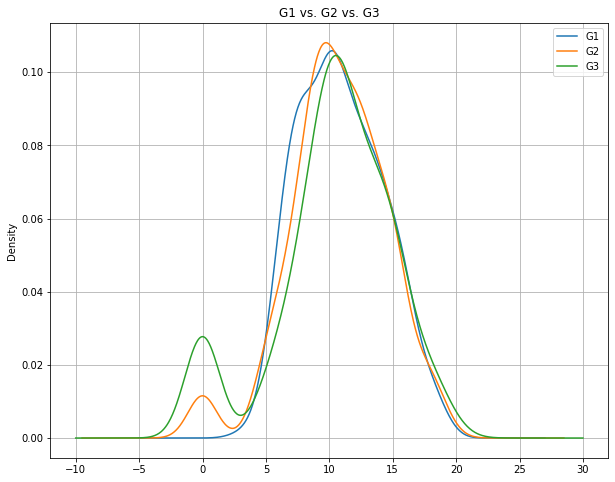

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
marks = data[['G1', 'G2', 'G3']]
marks.plot.kde(ax=ax, legend=True, title='G1 vs. G2 vs. G3')
ax.grid(axis='y')
ax.grid(axis='x')

Величины можно считать равномерно распределенными, хоть они такими не совсем являются.

## Нормализация данных

Для тестирования алгоритмов машинного обучения хорошо иметь данные, нормализованные разными способами. Но т.к. в этой лабораторной работе не требуется тестировать различные алгоритмы, я воспользуюсь т.н. Z-масштабированием: разницу между переменной и средним значением поделю на стандартное отклонение.

In [17]:
data_normalized = (data - data.mean()) / data.std()
data_normalized.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob2,Fjob3,Fjob4,reason0,reason1,reason2,reason3,guardian0,guardian1,guardian2
count,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,...,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02,3.950000e+02
mean,1.295167e-15,-3.597685e-17,-8.994212e-17,1.079305e-16,-2.473408e-16,-1.349132e-17,-1.573987e-16,8.994212e-17,-1.416588e-16,1.933756e-16,...,-1.236704e-17,8.994212e-18,-8.544501e-17,4.497106e-17,-1.124276e-16,-6.520804e-17,3.597685e-17,2.698264e-17,-8.994212e-17,-3.597685e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.329268e+00,-2.511445e+00,-2.317145e+00,-6.424347e-01,-1.233786e+00,-4.493737e-01,-3.283640e+00,-2.237990e+00,-1.894280e+00,-5.400138e-01,...,-1.102731e+00,-6.243842e-01,-2.811305e-01,-7.606127e-01,-6.165663e-01,-3.162668e-01,-6.009595e-01,-5.425264e-01,-1.494001e+00,-2.965318e-01
25%,-5.455950e-01,-6.845191e-01,-4.792490e-01,-6.424347e-01,-1.233786e+00,-4.493737e-01,6.211528e-02,-2.357113e-01,-9.960321e-01,-5.400138e-01,...,-1.102731e+00,-6.243842e-01,-2.811305e-01,-7.606127e-01,-6.165663e-01,-3.162668e-01,-6.009595e-01,-5.425264e-01,-1.494001e+00,-2.965318e-01
50%,2.380778e-01,2.289439e-01,-4.792490e-01,-6.424347e-01,-4.223229e-02,-4.493737e-01,6.211528e-02,-2.357113e-01,-9.778397e-02,-5.400138e-01,...,9.045440e-01,-6.243842e-01,-2.811305e-01,-7.606127e-01,-6.165663e-01,-3.162668e-01,-6.009595e-01,-5.425264e-01,6.676489e-01,-2.965318e-01
75%,1.021751e+00,1.142407e+00,4.396993e-01,7.912473e-01,-4.223229e-02,-4.493737e-01,1.177367e+00,7.654280e-01,8.004641e-01,5.826465e-01,...,9.045440e-01,1.597523e+00,-2.811305e-01,1.311401e+00,1.617780e+00,-3.162668e-01,1.659793e+00,-5.425264e-01,6.676489e-01,-2.965318e-01
max,4.156442e+00,1.142407e+00,1.358648e+00,3.658611e+00,2.340875e+00,3.584777e+00,1.177367e+00,1.766567e+00,1.698712e+00,3.950627e+00,...,9.045440e-01,1.597523e+00,3.548061e+00,1.311401e+00,1.617780e+00,3.153883e+00,1.659793e+00,1.838562e+00,6.676489e-01,3.363782e+00


## Вывод

Данный датасет обладает достаточно большим количеством признаков, которые оказались бесполезны для предсказывания годовой оценки по математике. Вряд ли этот датасет можно использовать на практике. Однако, было очень интересно провести этот анализ. \
\
Основные трудности вызвали: синтаксис при использовании библиотек для графической визуализации данных, недостаточные знания в теории вероятностей и выбор признаков, взаимосвязь которых следует анализировать.